In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [267]:
class Image:
    def __init__(self,path):
        self.img = cv2.imread(path)
    def show(self):
        plt.imshow(self.img)
        plt.show()
    def set_contr(self,alpha):
        self.contr = cv2.convertScaleAbs(self.img, alpha)
        self.img = self.contr
    def convertToGray(self):
        self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        #also change the img to the converted one
        self.img = self.gray
    def gaussianBlur(self, kernelSize):
        self.blur = cv2.GaussianBlur(self.img, (kernelSize, kernelSize), 0)
        self.img = self.blur
    def medianBlur(self, kernelSize):
        self.blur = cv2.medianBlur(self.img, kernelSize)
        self.img = self.blur
    def otsuThreshold(self):
        self.thresh = cv2.threshold(self.img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        self.img = self.thresh
    def logTransform(self):
        self.log = (np.log(self.blur+1)/(np.log(1+np.max(self.blur))))*255
        self.img = self.log
    def changeDataType(self):
        self.log = np.array(self.img,dtype=np.uint8)
        self.img = self.log
    def cannyEdgeDetection(self):
        self.edges = cv2.Canny(self.img,200,600)
        self.img = self.edges
    def morphologicalClosing(self):
        kernel = np.ones((9,7),np.uint8)
        self.closing = cv2.morphologyEx(self.img, cv2.MORPH_CLOSE, kernel)
        self.img = self.closing
    def featureDetection(self):
        orb = cv2.ORB_create(nfeatures=15)
        self.keypoints, self.descriptors = orb.detectAndCompute(self.img, None)
        self.featuredImg = cv2.drawKeypoints(self.img, self.keypoints, None)
        self.img = self.featuredImg
    #add a combination of methods to get the final image
    def getFinalImage(self):
        self.convertToGray()
        self.medianBlur(5)
        self.logTransform()
        self.changeDataType()
        self.morphologicalClosing()
        self.featureDetection()
        self.show()
#def another method like getFinalImage but

In [269]:
image = Image(r"C:\Users\dimas\Downloads\Why-Asphalt-Cracks-and-What-to-Do-About-It.jpg")

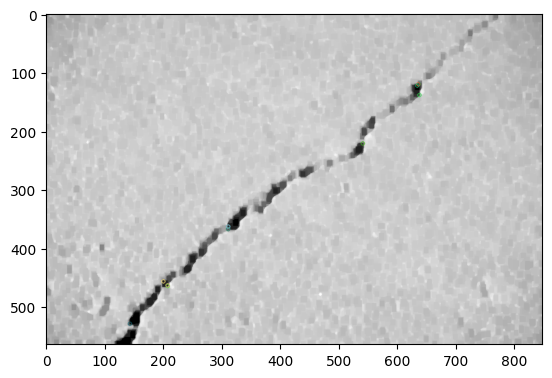

In [264]:
image.getFinalImage()

In [270]:
image.convertToGray()

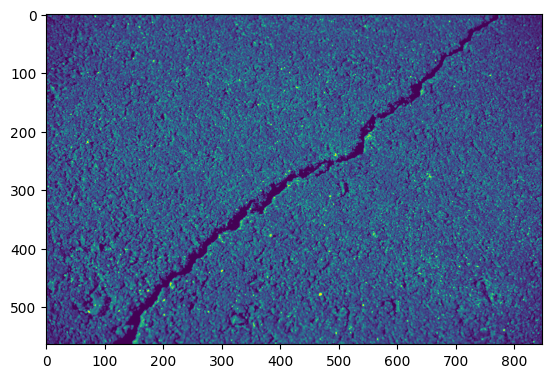

In [271]:
image.show()

In [272]:
image.medianBlur(5)

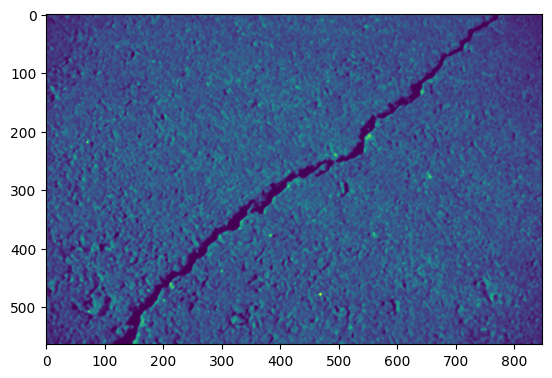

In [273]:
image.show()

In [274]:
image.logTransform()

In [275]:
image.changeDataType()

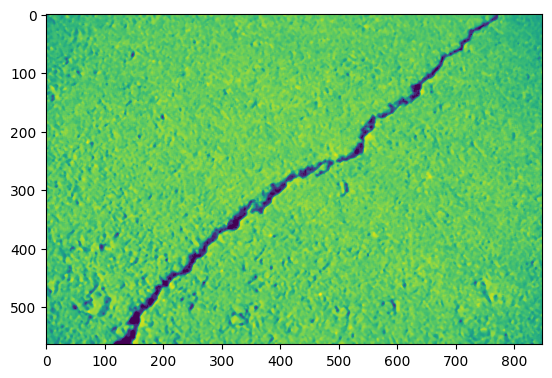

In [276]:
image.show()

In [277]:
image.morphologicalClosing()

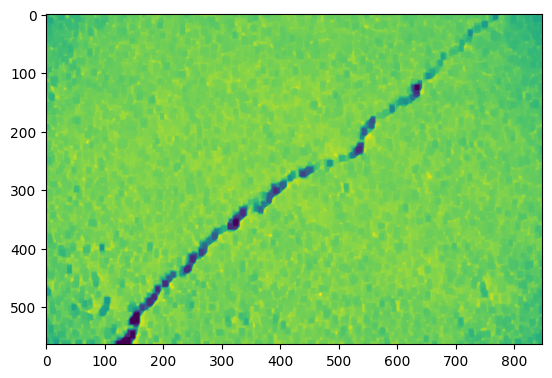

In [278]:
image.show()

In [279]:
image.featureDetection()

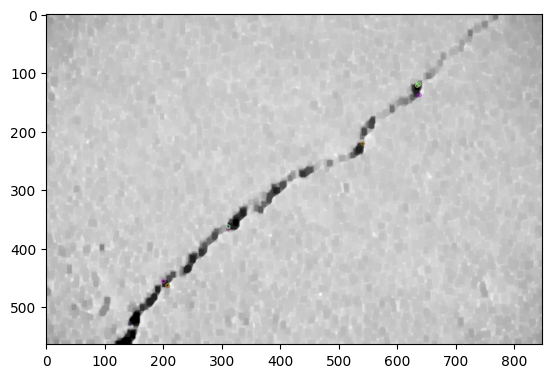

In [280]:
image.show()